<a href="https://colab.research.google.com/github/hwayoung306/AI/blob/main/20220510_ml_09_%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 코렙에서 한글 사용

In [1]:
!apt -qq -y install fonts-nanum
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.




```
# Windows 한글
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
```



### 구글드라이브 연동

In [3]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/My Drive/temp/'

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/My Drive/temp/'

Mounted at /gdrive
 매수종목1.txt			       'sample (1).xlsx'
'2. 영화평점, 날짜별 영화평점 시각화'   sample2.pdf
 매수종목2.txt			        sample.docx
 atlas-higgs-challenge-2014-v2.csv.gz   sample_merge.pdf
 auto-mpg.csv			        sample.xlsx
 bmi_500.csv			        score.csv
 매수종목.csv			        seoul.html
 data_studentlist_en.csv	       'stock price (1).xlsx'
'demo (1).docx'			       'stock price.xlsx'
 demo.docx			        stock_px.csv
 example.docx			       'stock valuation.xlsx'
 heart_disease.csv		        test.db.db
 height_weight.txt		        test.txt
 hello_world.xlsx		        Titanic배포용
 HelloWorld.xlsx		        titanic_test.csv
'house_price (1).csv'		        titanic_train.csv
 house_price.csv		        titanic.xls
'little-char (1).png'		        titanic.xlsx
 little-char.png		        Traffic_Accident_2017.csv
 population_number.csv		        train.csv
 ram_price.csv			        user_id_mean.csv
 ratings_small.txt		        wine.csv
'sample1 (1).pdf'		        주ᄀ

In [4]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

In [5]:
!pip install mglearn

     |████████████████████████████████| 540 kB 7.6 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=1092a787737a7a82f6d9077be676b27ed69be0a2b05f993b031fbd7427d3d98a
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


# 비지도 학습(Unsupervised Learning)

- 데이터에 대한 Label(명시적인 답)이 주어지지 않은 상태에서 컴퓨터를 학습시키는 방법
- 입력에 대한 정답을 찾는 것이 아닌 입력데이터의 패턴, 특성 등을 학습을 통해 발견하는 방법
- 데이터를 비슷한 특성끼리 묶는 군집과 차원축소로 나누어짐

<center>
 <img src="https://artisansasylum.com/wp-content/uploads/2019/09/machine-learning-info.png" alt="머신러닝종류" width="80%" />

머신러닝종류

</center>

<center>

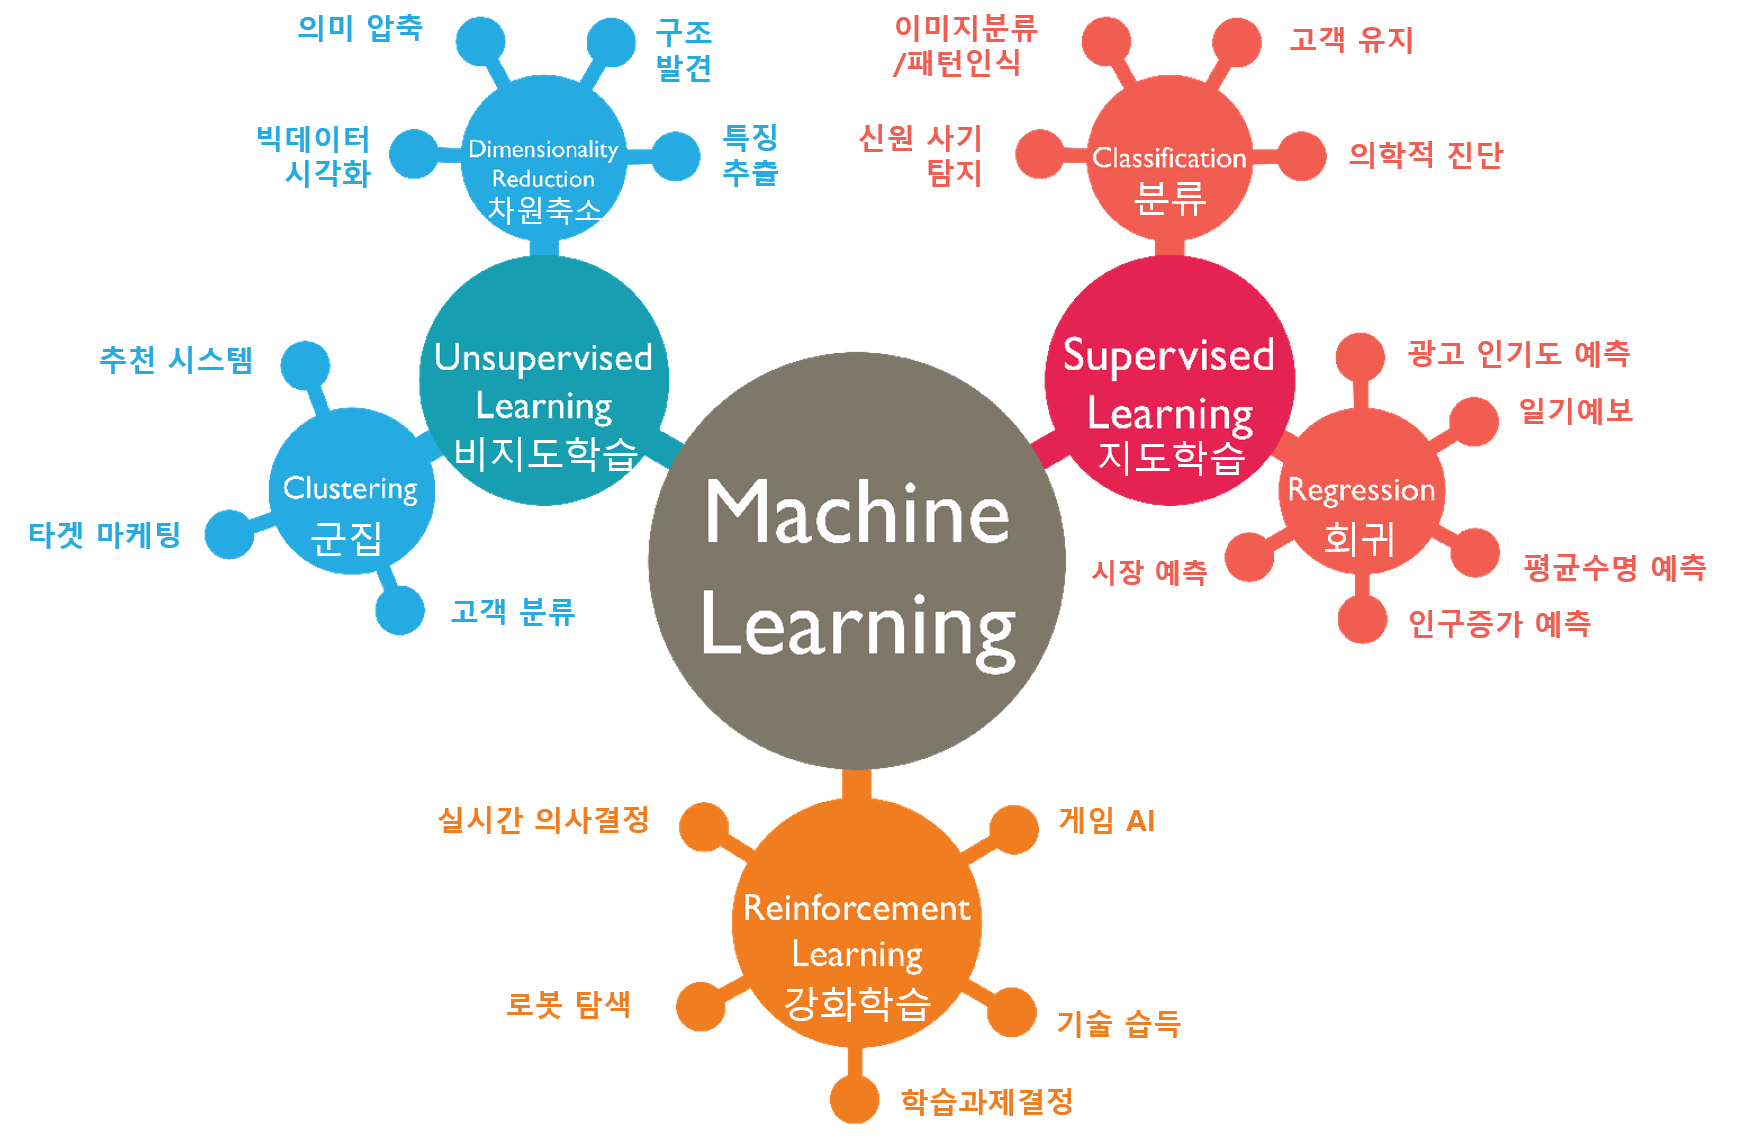
</center>

비지도학습 사용 이유

- 시각화, 데이터 압축, 추가적인 처리를 위해 정보가 더 잘 드러나는 표현을 찾기 위함
- 데이터 과학자들이 데이터를 더 잘 이해하고 싶을 때 탐색적 분석 단계에서 많이 사용
- 지도학습의 전처리 단계에서 활용 : 비지도 학습으로 새롭게 표현된 데이터를 사용해 지도 학습을 수행하면 정확도가 높아지고 메모리 및 시간을 절약할 수 있음.
- 스케일링 메소드 → 비지도 방식

단점

- 알고리즘이 유용한 것을 학습했는지 평가하기 어려움 → 레이블이 없는 데이터이므로
- 해당 결과를 직접 확인하는 것이 유일한 방법일 때가 있음


차원 축소 (Dimension Reduction) or 변환 (Transformation)

- 데이터를 압축해서 새로운 특성(컬럼)을 바꾸겠다
- 데이터를 새롭게 표현하여 사람이나 다른 머신러닝 알고리즘이 원래 데이터보다 쉽게 해석할 수 있도록 만드는 작업
- 고차원 데이터의 특성의 수를 줄이면서 필요한 특징을 포함한 데이터로 표현 (3차원 -> 2차원)
- 데이터를 구성하는 단위나 성분을 찾아서 표현 (텍스트 문서에서 주제 검색)

군집 (Clustering)

- 특성들의 요소(샘플, row)들을 비슷한 값을 묶어주는 것
- 동일한 그룹(클러스터)의 개체가 다른 그룹의 개체보다 서로 비슷하도록 개체 집합을 그룹화하는 작업 (ex : MBTI, 혈액형)
- 분류 알고리즘과 비슷하게 각 데이터 포인트가 어느 클래스에 속하는지 예측(할당)
- (예) 업로드한 사진을 분류하기 위해 비슷한 사람끼리 묶는 작업

비지도 학습의 군집, 밀도 추정, 공간 변환

- 군집 : 유사한 샘플을 모아 같은 그룹을 묶음 (맞춤광고, 영상분할,유전자 분석, SNS 검색어 분석 등)
- 밀도 추정 : 데이터로부터 확률분포를 추정하는 일 (분류, 생성 모델 구축 등)
- 공간 변환 : 원래 특징 공간을 저차원 또는 고차원 공간으로 변환하는 일 (데이터시각화, 압축, 특징추출 등)

<center>
군집, 밀도 추정, 공간 변환
</center>

<center>

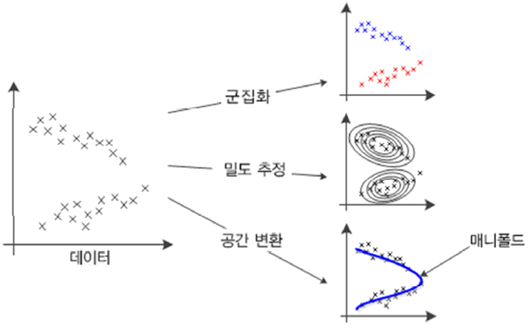

</center>

# 차원축소(Dimension Reduction)




차원(Dimension)
- 1차원이 직선, 2차원이 평면, 3차원이 이른바 공간인 것처럼 독립적으로 취할 수 있는 좌표축의 수.

- 우리가 다뤄야할 데이터안의 특성(컬럼) 한 개 한 개가 독립적인 차원인 것!

- 데이터를 분석하기 위해서 기본이 되는 단위.


차원의 저주(Curse of Dimensionality) 

- 고차원 공간을 직관적으로 상상하기 어려움
 > 1000차원의 공간에서 휘어져 있는 200차원의 타원체는?

 > 기본적인 4차원의 초입방체(hypercube)는?

- 데이터가 고차원이 될수록 데이터 공간의 부피가 기하급수적으로 증가, 데이터 밀도는 희소(sparse)해짐

- 차원이 증가할수록 데이터 간의 거리가 멀어짐 → 데이터가 분산될 가능성이 높음 → 과대적합 증가

- 해결방안 : 데이터의 밀도가 높아질 때까지 데이터 확보
→ 필요 데이터가 기하급수적으로 증가하는 문제 발생


차원축소(Dimensionality Reduction) 

- MNIST 데이터에서 검정색 부분의 특성은 줄여도 학습하는데 큰 문제가 없음 → 차원축소

- 즉, 데이터의 의미를 제대로 표현하는 특징을 추려내는 것!

- 차원축소를 통해 시간 단축 및 메모리 사용 효율성 증대
→ 단! 잘못 사용하면 중요 특성이 사라져 성능이 저하될 수 있음


#### 차원축소 방법



투영 (Projection)

- 3차원 공간상의 데이터를 2차원 부분 공간으로 투영(porjection)시켜 만들어진 2D 데이터셋
<center>
 <img src="https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile1.uf.tistory.com%2Fimage%2F99EABC3E5B8A48781BEFA4" alt="투영" width="60%" />

</center>


## 주성분분석 (PCA, Principal Component Analysis)

- 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal Component)을 추출해 차원을 축소하는 기법

- 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소 (주성분)

 - 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주

- 죄표축을 기준으로 차원 축소? → 점들이 겹치면 정보유실

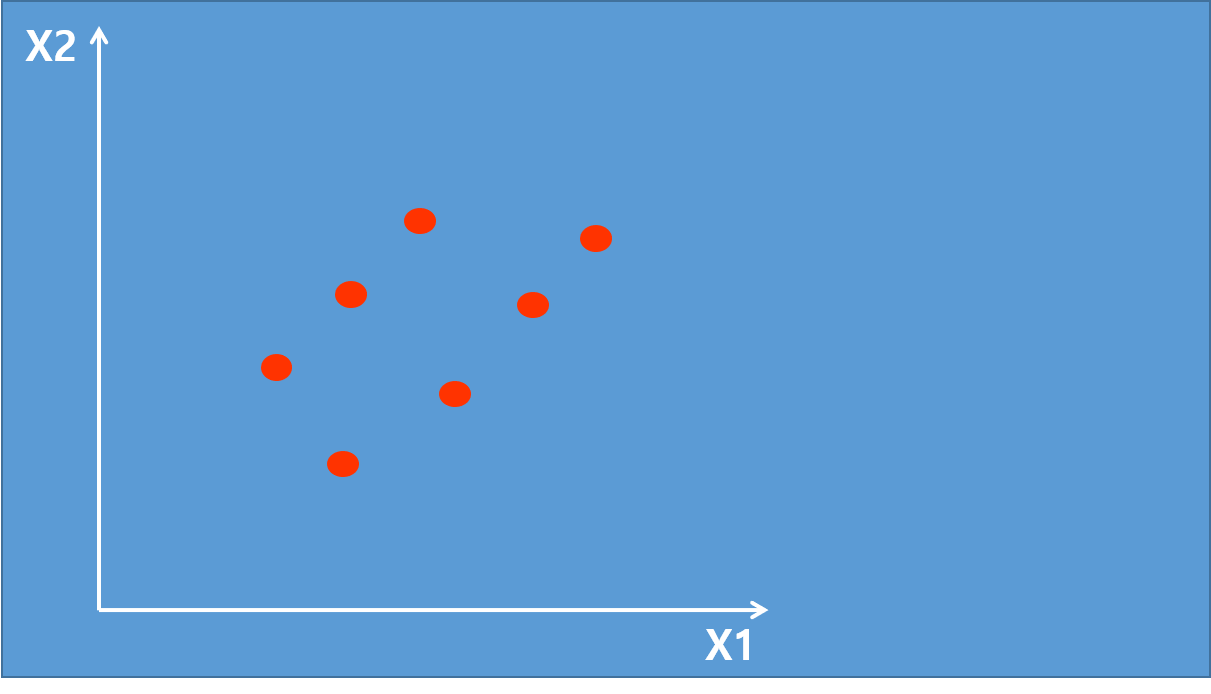

- 데이터의 분산이 가장 큰 방향으로 축 생성
- 주성분(Principal Component) : 주된 분산의 방향

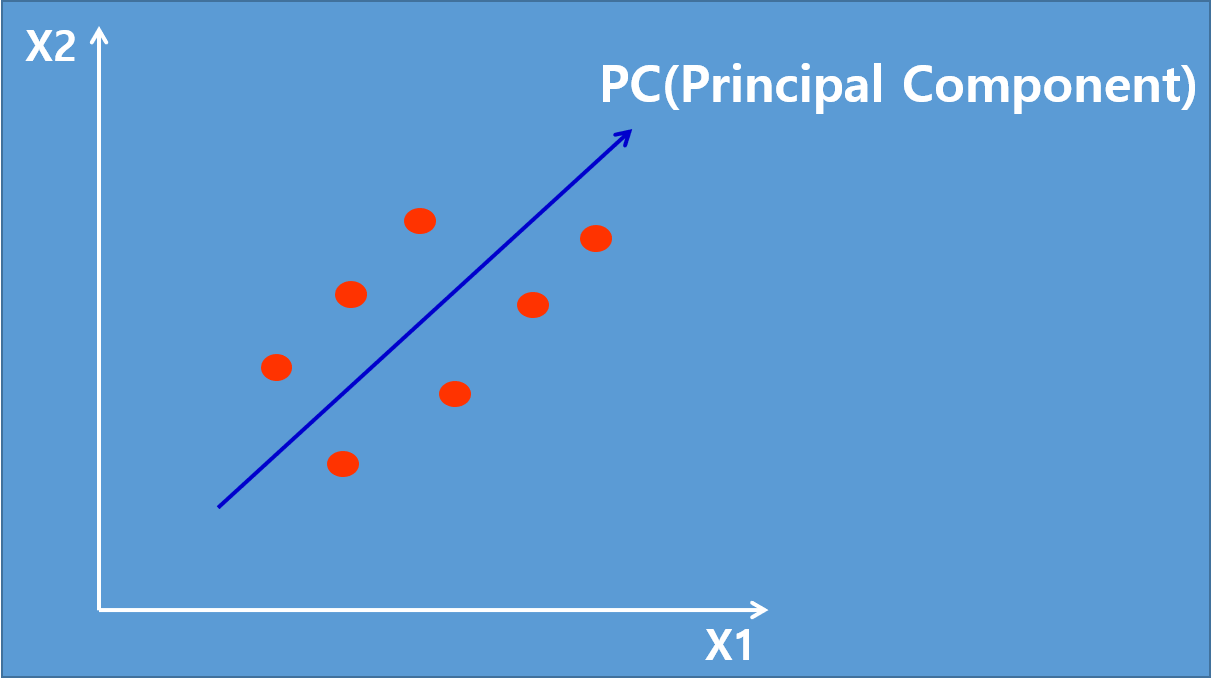

- 새로운 축으로 데이터 투영

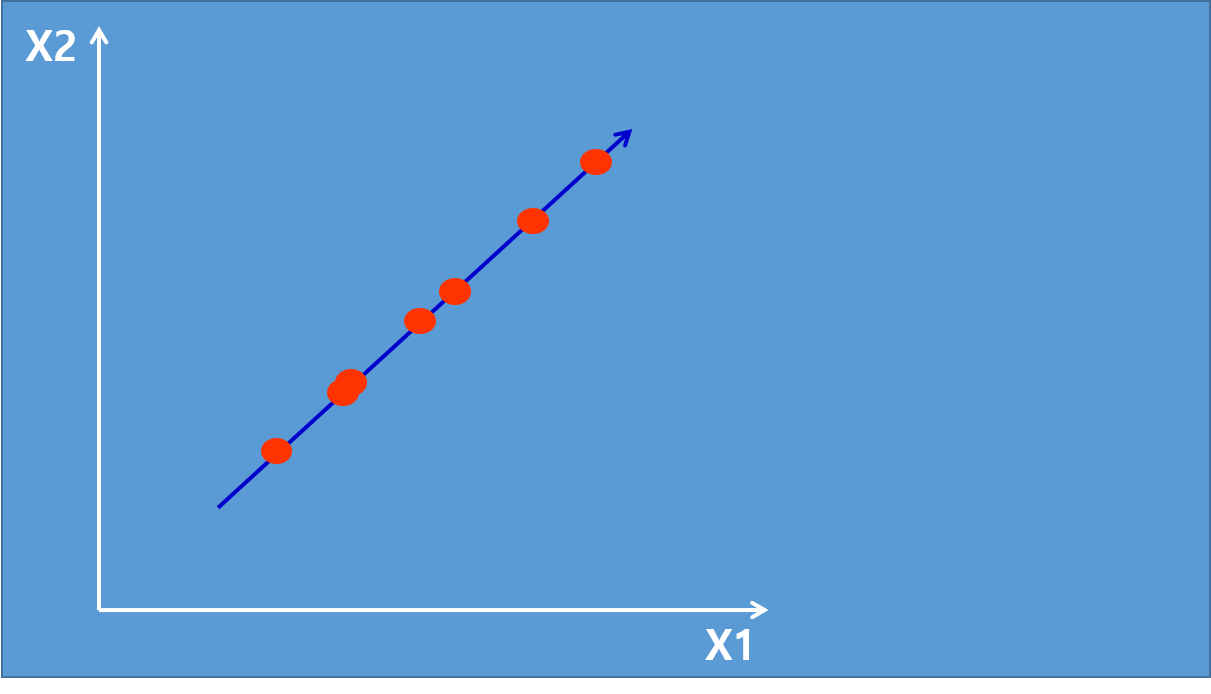

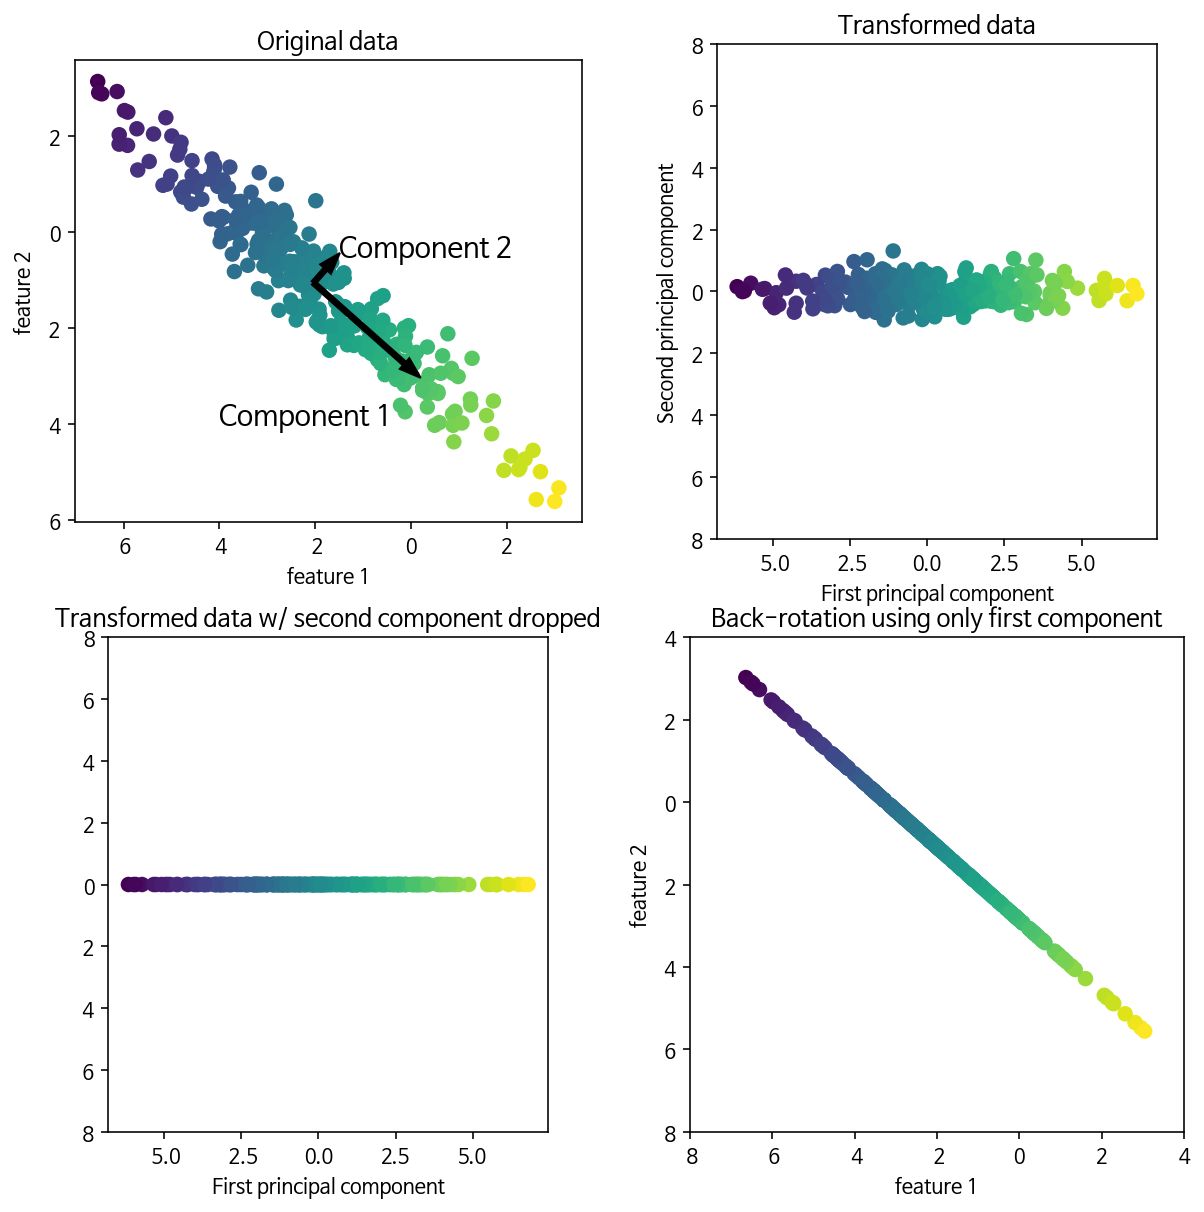

In [28]:
# PCA를 이용한 데이터 변환
import mglearn
mglearn.plots.plot_pca_illustration()

- 데이터에서 노이즈를 제거하거나 주성분에서 유지되는 정보를 시각화하는데 이용
- PCA가 가장 널리 사용되는 분야는 고차원 데이터셋의 시각화
  - 3개 이상의 특성을 가진 데이터를 산점도로 표현하기 어려움

#### PCA 실습 01

고차원 데이터셋의 시각화
- 유방암 데이터셋 시각화

In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


- 산점도를 그리려면
> 30개 특성에서 2개씩 짝짓게 되므로
>\begin{equation} \begin{pmatrix} 30 \\ 2 \end{pmatrix}=\frac { 30! }{ 2!(30-2)! } =30\times \frac { 29! }{ 2!\times 28! } = 30\times 14.5=435 \end{equation}

- 각 특성의 히스토그램을 그림


<분류하기에 좋은 특성인지 특성별로 확인해 볼 수 있음>

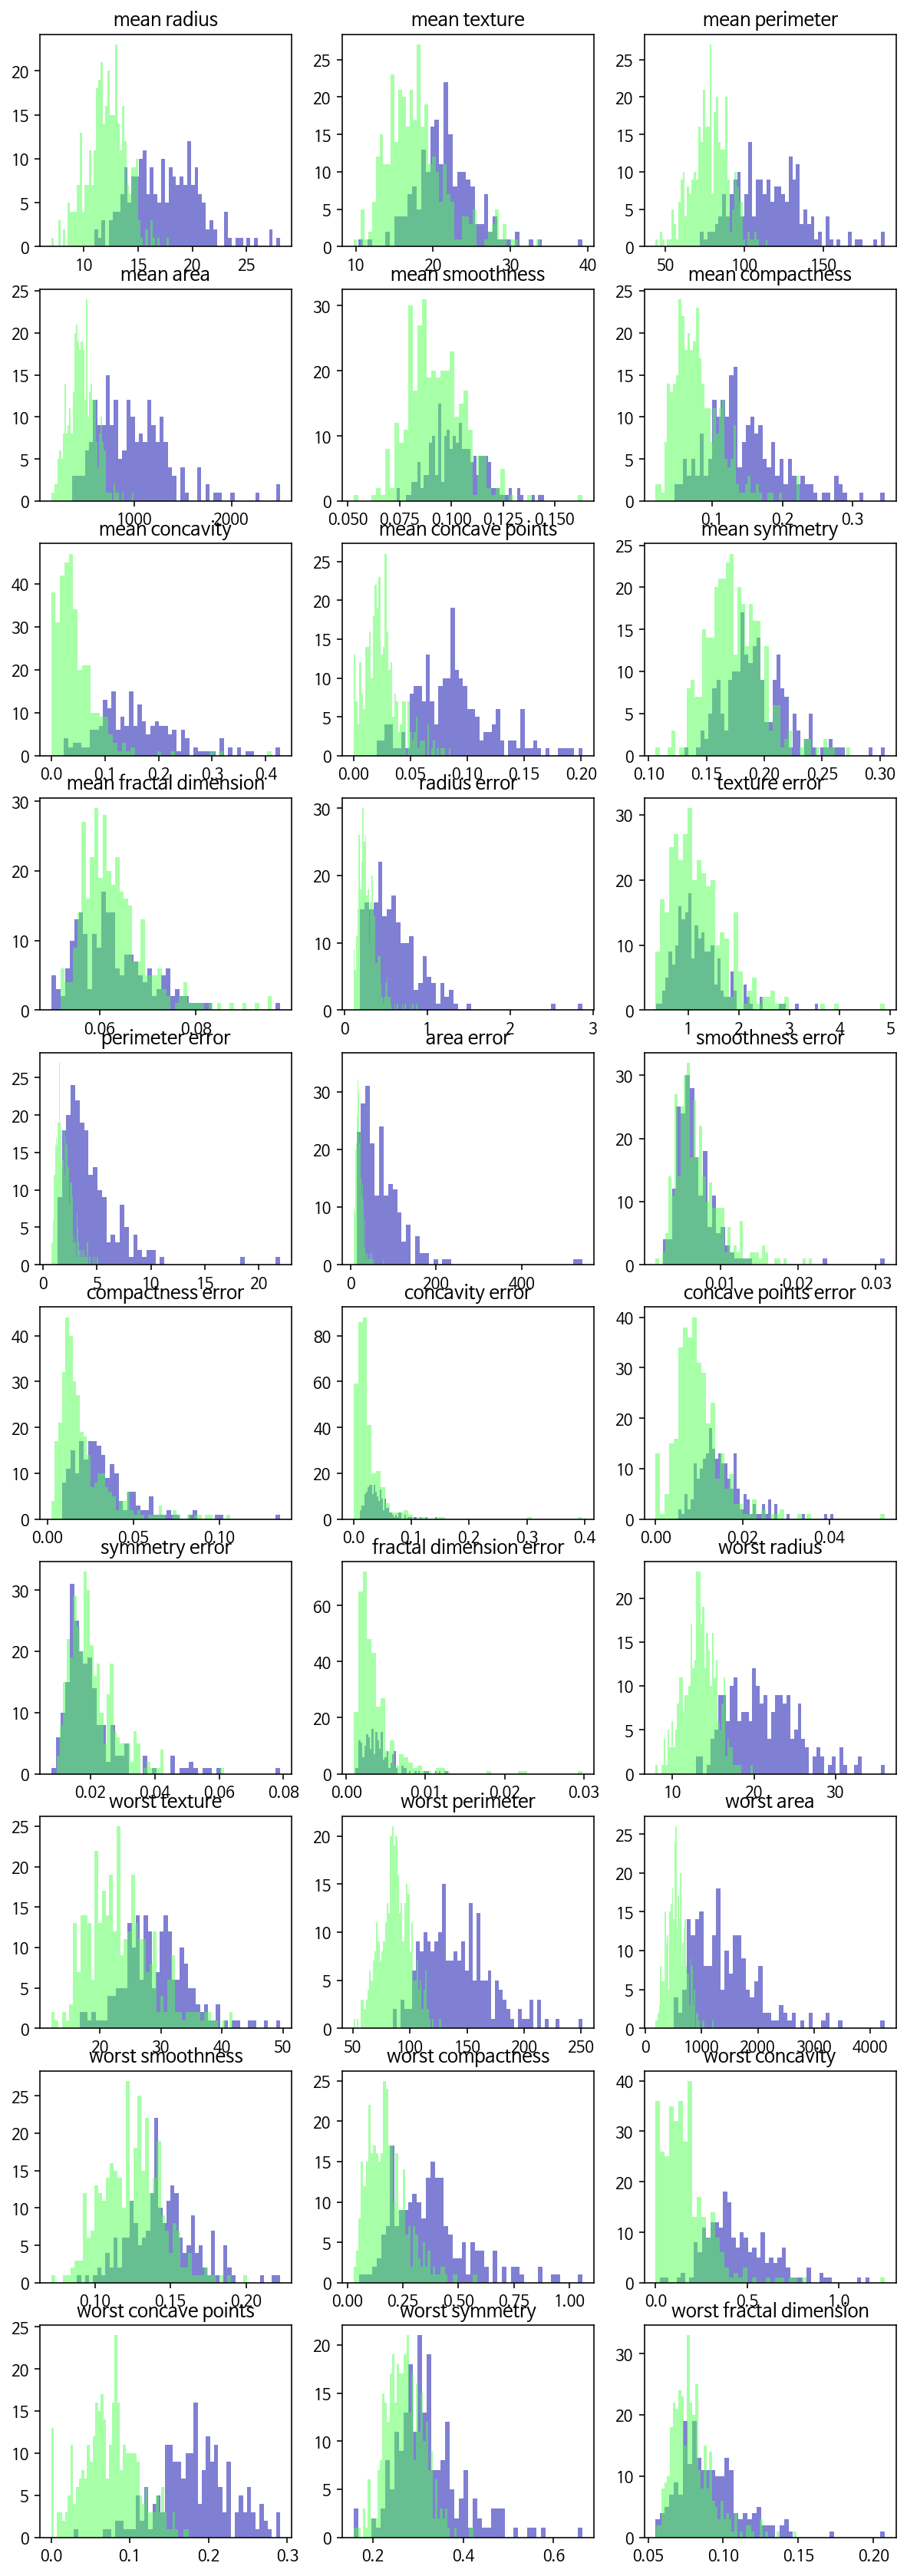

In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m = cancer.data[cancer.target == 0]
b = cancer.data[cancer.target == 1]

fig, axes = plt.subplots( 10, 3, figsize=(10, 30) )
for i, ax in zip( range(30), axes.ravel()) :    
    ax.hist(m[:, i], bins = 50, color = mglearn.cm3(0), alpha = 0.5)
    ax.hist(b[:, i], bins = 50, color = mglearn.cm3(2), alpha=0.5)
    ax.set_title(cancer.feature_names[i])

plt.show()

- 초록색은 양성, 푸른색은 악성
- 특성들이 클래스별로 어떻게 분포되어 있는지 파악
- 어떤 특성이 양성과 악성 샘플을 구분하는데 더 좋은지 파악

- 특성 간의 상호작용이나 이 상호작용이 클래스와 어떤 관련이 있는지 알 수 없음

PCA를 적용

In [41]:
# 특성의 분산이 1이 되도록 데이터의 스케일을 조정
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

# 데이터로드
cancer = load_breast_cancer()

# 스케일 조정
X_scaled = StandardScaler().fit_transform(cancer.data)
X_scaled.shape

(569, 30)

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state=0)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_pca.shape

(569, 2)

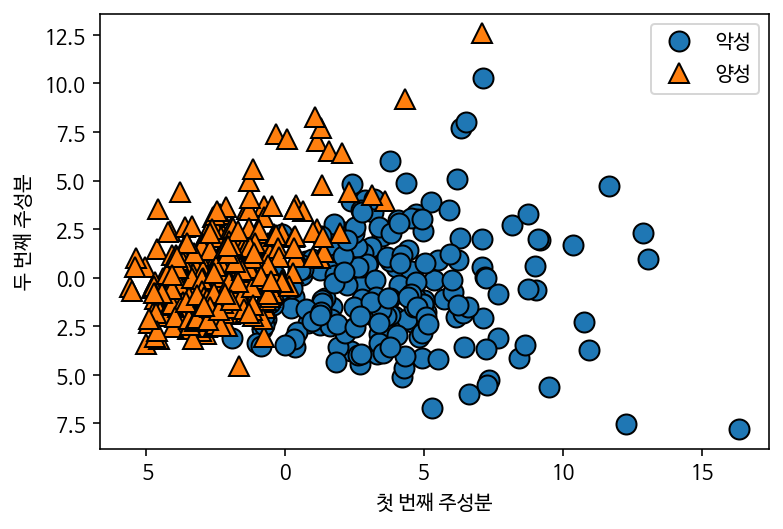

In [45]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 시각화
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:,1], cancer.target)
plt.legend(['악성', '양성'])
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분')
plt.show()

In [46]:
pca.components_.shape

(2, 30)

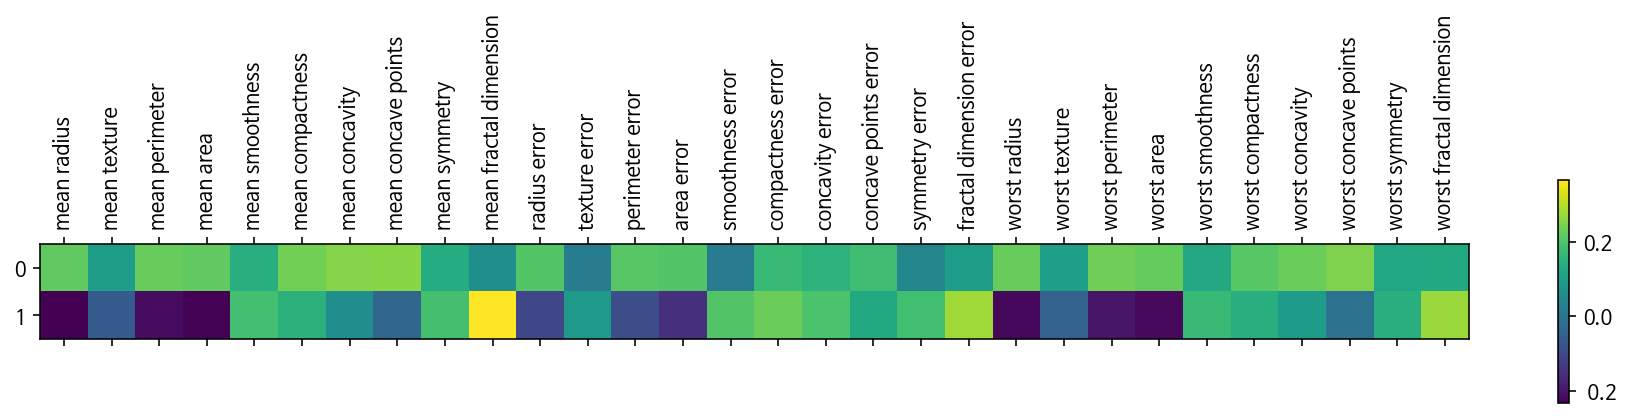

In [48]:
# 주성분 값을 히트맵으로 시각화
plt.matshow(pca.components_, cmap = 'viridis')
plt.xticks(range(30), cancer.feature_names, rotation=90)
plt.colorbar()

#### PCA 실습 02

데이터셋 압축
- 붓꽃 데이터셋의 속성 4가지를 2개로 압축

In [52]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


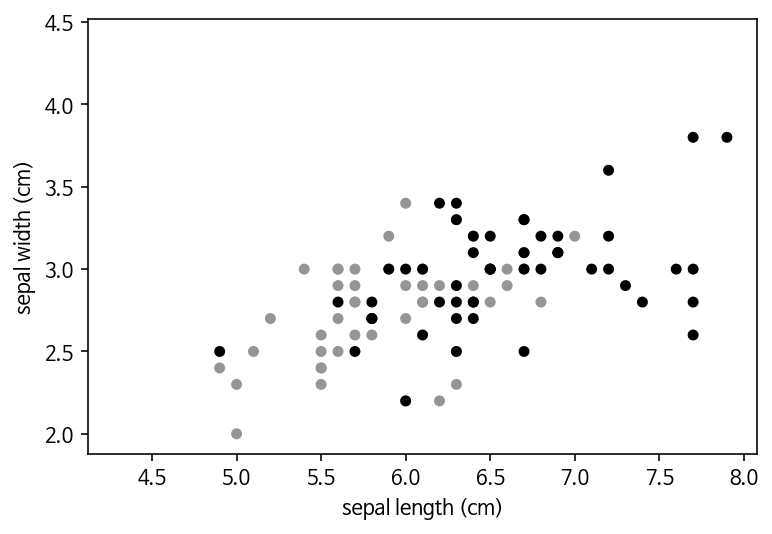

In [53]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
# setosa의 target 값은 0, versicolor는 1, virginica는 2.
# 각 target 별 산점도 
df.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', c=iris.target)
plt.show()

PCA를 이용한 압축 적용

In [55]:
# PCA적용 전 개별 속성을 스케일링
# StandardScaler를 이용하여 표준 정규 분포를 가지는 값들로 변환
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, :-1]
X_scaled = StandardScaler().fit_transform(X)
X_scaled.shape

(150, 4)

In [56]:
# PCA 변환
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0).fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_pca.shape

(150, 2)

In [59]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
df_pca = pd.DataFrame(X_pca, columns=['pca_0', 'pca_1'])
df_pca[ 'target' ] = iris.target
df_pca.head()

,pca_0,pca_1,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


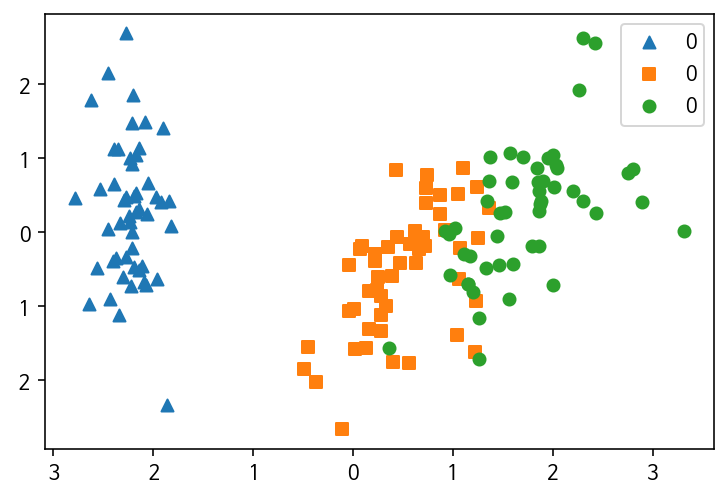

In [62]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
# df_pca.plot(kind='scatter', x='pca_0', y='pca_1', c='target')
markers = ['^', 's', 'o']
for i, m in enumerate(markers) :
    X_data = df_pca[ df_pca['target'] == i]['pca_0']
    y_data = df_pca[ df_pca['target'] == i]['pca_1']
    plt.scatter(X_data, y_data, marker=m, label=iris.target[i])

plt.legend()
plt.show()

In [64]:
# 분산 비율 확인
print( '주성분 분산 비율 : ', pca.explained_variance_ratio_)
print('주성분 분산 : ', pca.explained_variance_)

주성분 분산 비율 :  [0.72962445 0.22850762]
주성분 분산 :  [2.93808505 0.9201649 ]


In [65]:
# 4차원 데이터를 2차원으로 PCA 변환한 데이터 세트에 램덤 포레스트 적용
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

model = RandomForestClassifier(random_state=0)
scores = cross_val_score(model, iris.data, iris.target, scoring ='accuracy', cv =5)
print( scores.mean(), scores )

0.9666666666666668 [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]


In [67]:
scores = cross_val_score(model, X_pca, iris.target, scoring='accuracy', cv=5)
print( scores.mean(), scores )

0.9 [0.83333333 0.93333333 0.83333333 0.9        1.        ]


#### PCA 실습 03

특성 추출에 이용
- 고유얼굴 특성 추출
- 2000년 초반 이후의 정치인, 가수, 배우, 운동선수들의 얼굴을 포함한 LFW 데이터셋 이용


In [68]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person = 20, resize=0.7)

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])


'Winona Ryder'

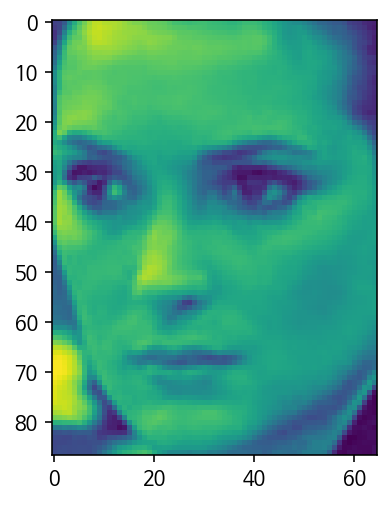

In [73]:
print( people.keys() )
# print( people.DESCR )

people.data[0].shape
people.images[0].shape
plt.imshow(people.images[0])

people.target[0]
people.target_names[people.target[0] ]

In [75]:
# 각 타깃이 나타난 횟수 계산
# 타깃별 이름과 횟수 출력 -> 불균형 데이터 셋
people.images.shape
np.bincount( people.target )

array([ 39,  35,  21,  36,  20,  77,  42,  24,  29,  21, 236,  31, 121,
        22, 530, 109,  44,  26,  30,  22,  39,  71,  20,  28,  52,  55,
        21,  42,  21,  24,  20,  53,  31,  23,  28,  60,  32,  41,  22,
        41,  48,  29,  33,  20,  22,  37,  20,  22,  30,  27,  32,  26,
        23,  52,  33,  23,  25,  33, 144,  32,  49,  24])

In [76]:
len( np.unique( people.target ))

62

In [78]:
np.zeros( people.target.shape, dtype =np.bool).shape

(3023,)

In [80]:
# 언더 샘플링
mask = np.zeros( people.target.shape, dtype = np.bool )
for target in np.unique( people.target ) :
    mask[ np.where(people.target == target)[0][:50]] = 1

mask.shape

(3023,)

In [81]:
# 50개가 넘으면 True, 안넘으면 False
mask[1]

True

In [82]:
X = people.data[mask]
y = people.target[mask]

X.shape, y.shape

((2063, 5655), (2063,))

In [83]:
X = X / 255. # minmax

- 얼굴인식 : 새로운 얼굴이 기존 얼굴 중 하나에 속하는지 찾는 작업 
- 사람 수는 많으나 각 사람에 대한 이미지가 적기 때문에 클래스별 훈련 데이터가 적음
- 분류하려는 얼굴과 가장 비슷한 얼굴 이미지를 찾는 KNN을 이용

In [85]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    random_state =0)

model = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
model.score(X_test, y_test)

0.23255813953488372

- PCA의 화이트닝(백색화) 옵션을 사용해서 주성분의 스케일이 같아지도록 조정
  - StandardScaler을 적용한 것과 동일

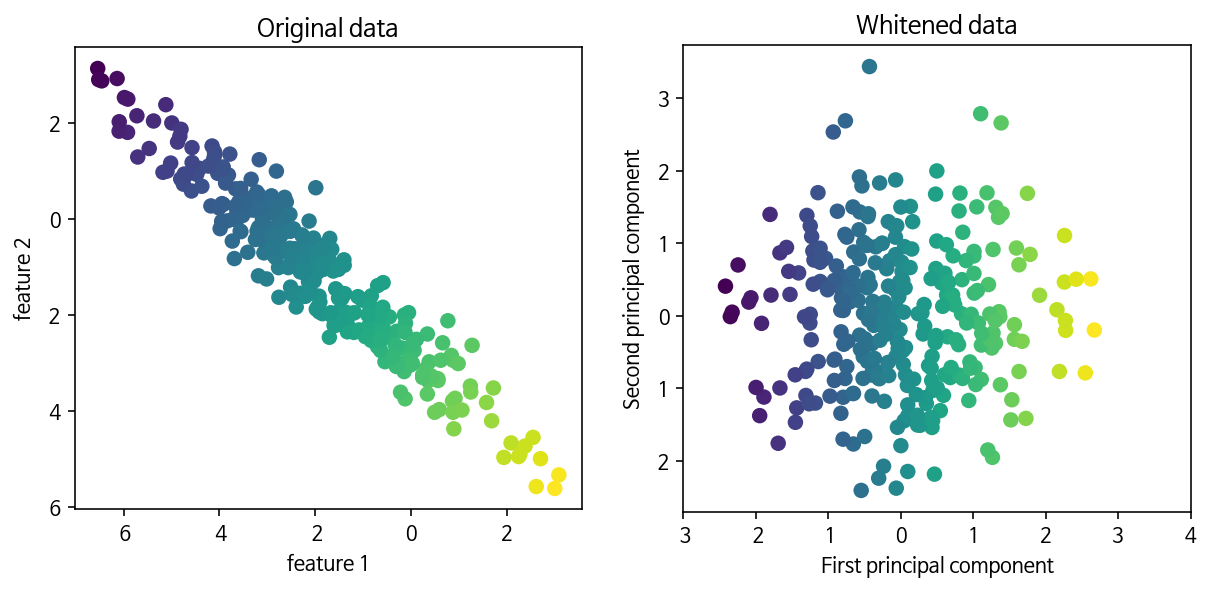

In [24]:
mglearn.plots.plot_pca_whitening()

- 데이터 회전과 스케일이 조정되어 타원이 아닌 원 모양으로 바뀜

In [86]:
# 100개의 주성분을 추출

from sklearn.decomposition import PCA

pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca.shape, X_test_pca.shape

((1547, 100), (516, 100))

In [87]:
# 이미지 분류
model = KNeighborsClassifier(n_neighbors=1).fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.312015503875969


- 주성분이 데이터를 더 잘 표현한다고 직관적 판단이 가능

In [88]:
people.images[0].shape

(87, 65)

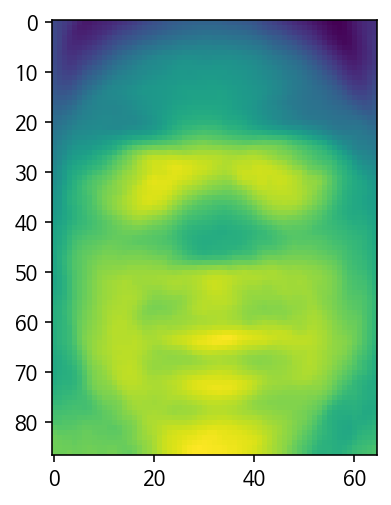

In [91]:
# 주성분 처음 15개를 확인

pca.components_.shape
plt.imshow( pca.components_[2].reshape(87, 65))
plt.show()

- 첫 번째 주성분은 얼굴과 배경의 명암 차이를 기록
- 두 번째 주성분은 오른쪽과 왼쪽 조명의 차이를 기록
- 사람이 인지하는 방식과 알고리즘이 데이터를 해석하는 방식이 다름
 - 사람은 나이, 성별, 표정, 머리 모양 같은 픽셀의 강도로 표현하기 어려운 속성을 사용
 - PCA 모델은 픽셀을 기반으로 얼굴의 배치와 조명 등의 속성을 사용

## 선형판별분석 (LDA, Linear Discriminant Analysis)

- PCA와 유사하게 입력 데이터 세트를 저차원 공간으로 투영(project)해 차원을 축소하는 기법

- PCA와 다르게 LDA는 지도학습의 분류(Classification)에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소

- LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산(between-class scatter)과 클래스 내부 분산(within-class scatter)의 비율을 최대화하는 방식으로 차원을 축소

<center>
 <img src="https://blog.kakaocdn.net/dn/KOqHC/btqGebaAiIc/CKAMR23KhIcmh6UK198bd1/img.png" alt="클래스 간 분산과 내부 분산" width="40%" />

</center>

- LDA는 투영을 통해 가능한 한 클래스를 멀리 떨어지게 하므로 SVM 같은 다른 분류 알고리즘을 적용하기 전에 차원을 축소시키는 데 사용

#### LDA 실습 01

붓꽃 데이터 세트에 LDA 적용

In [92]:
# 특성의 분산이 1이 되도록 데이터의 스케일을 조정
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# 데이터로드
iris = load_iris()

X = iris.data
y = iris.target

X_scaled = StandardScaler().fit_transform(X)

- LDA는 PCA와 다르게 비지도학습이 아닌 지도학습
- 클래스의 Target 값이 변환 시에 필요

In [94]:
# LDA 모델 학습
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_scaled, y)

X_lda = lda.transform(X_scaled)
X_lda.shape

(150, 2)

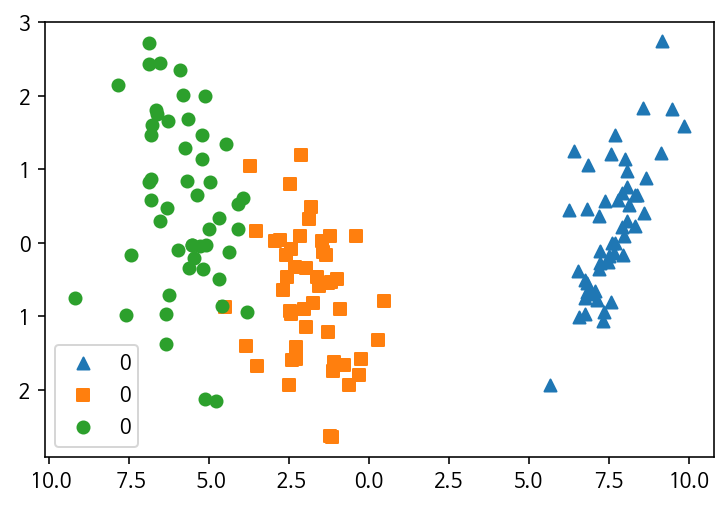

In [96]:
# LDA 변환된 데이터를 시각화
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# DataFrame 변경
df = pd.DataFrame(X_lda, columns=['pca_0', 'pca_1'])
df['target'] = y

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
# setosa의 target 값은 0, versicolor는 1, virginica는 2.
# 각 target 별 산점도 
markers = ['^', 's', 'o']
for i, m in enumerate(markers):
  x_data = df[ df['target'] == i ]['pca_0']
  y_data = df[ df['target'] == i ]['pca_1']
  plt.scatter(x_data, y_data, marker=m, label=iris.target[i])

plt.legend()
plt.show()

In [97]:
# 4차원 데이터를 2차원으로 PCA 변환한 데이터 세트에 램덤 포레스트 적용
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

model = RandomForestClassifier(random_state=0)
scores = cross_val_score(model, iris.data, iris.target, scoring ='accuracy', cv =5)
print( scores.mean(), scores )

0.9666666666666668 [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]


In [98]:
scores = cross_val_score(model, X_lda, iris.target, scoring='accuracy', cv=5)
print( scores.mean(), scores )

0.9666666666666666 [1.         1.         0.9        0.93333333 1.        ]


## 특이값분해 (SVD, Singular Value Decomposition)

- PCA의 경우 정방행렬(행과 열의 크기가 같은 행렬)만을 고유벡터로 분해할 수 있으나 SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에 대해서도 적용 가능

- SVD는 m x n 크기의 행렬 A를 분해

 <center>
 <img src="https://www.pikpng.com/pngl/b/563-5634372_where-a-is-the-input-data-matrix-u.png" alt="특이값분해" width="60%" />

 출처: https://www.pikpng.com/transpng/hxRRmbR/

 </center>

 - 행렬 U와 V에 속한 벡터는 특이 벡터(Singular Vector)이며, 모든 특이 벡터는 서로 직교하는 성질을 갖음
 - ∑는 직사각 대각 행렬이며, 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0
 - m < n인 경우 첫번째와 같이 분해되며, m > n인 경우 두번째와 같이 분해
 - ∑의 0이 아닌 대각 원소값을 특이값(Singular Value)라고 함
 

- Truncated SVD는 ∑의 대각원소 중에 상위 몇 개만 추출해서 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것
 - 데이터 정보가 압축되어 분해되므로 원본 행렬을 정확하게 복원할 수는 없으나 상당 수준의 근사값으로 복원이 가능

#### SVD 실습 01

붓꽃 데이터 세트에 TruncatedSVD 적용

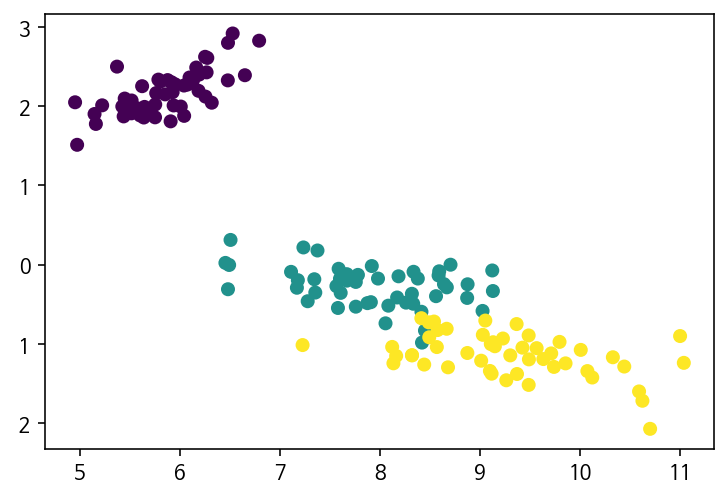

In [99]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
X = iris.data
y = iris.target

# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2, random_state=0)
X_tsvd = tsvd.fit_transform(X)
X_tsvd.shape

# TruncatedSVD 변환 된 데이터 산점도. 품종은 색깔로 구분
plt.scatter(X_tsvd[:, 0], X_tsvd[:,1], c= y)
plt.show()

- PCA와 유사하게 변환 후 품종별로 클러스터링이 가능할 정도의 고유성을 가지고 있음

Text(0.5, 1.0, 'PCA Transformed')

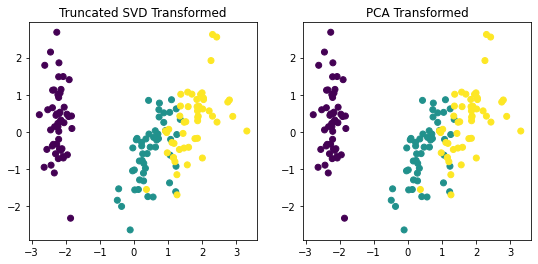

In [ ]:
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
# 스케일링된 데이터를 기반으로 PCA 변환 수행 
# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현 


- 스케일링된 데이터를 기반으로 변환하면 두 개가 거의 동일함

In [ ]:
# 평균값 비교


- 모두 0에 가까운 값으로 2개의 변환이 서로 동일
- 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행

- PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능하며 SVD는 희소 행렬(Spares Matrix)에 대한 변환도 가능

- SVD는 PCA와 유사하게 컴퓨터 비전 영역에서 이미지 압축을 통한 패턴 인식과 신호 처리 분야에 사용됨

## t-SNE(t-Distributed Stochastic Neighbor Embedding)

- 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 알고리즘

- t-SNE는 각 데이터를 2차원에 무작위로 표현한 후 임의로 하나의 데이터를 선정

- t-분포 그래프에서 임의로 선정한 데이터를 기준점으로 하여 다른 데이터와의 거리에 있는 t-분포 값을 선택

- 이 t-분포 값을 친밀도라 하고, 이 친밀도가 가까운 값끼리 묶음


- t-SNE 알고리즘은 원본 특성 공간에서 가까운 포인트는 더 가깝게 멀리있는 포인트는 더 멀어지게 만듬
- 멀리 떨어진 포인트와의 거리를 보존하기 보다는 가까이 있는 포인트에 더 많은 비중을 둠 
- 그러나 PCA처럼 군집이 중복되지 않는다는 장점은 있지만 매번 계산 할 때마다 축의 위치가 바뀌어 다른 모양이 나타남
- 탐색적 분석에서는 유용하지만 지도학습용으로는 거의 사용하지 않음



#### 매니폴드 학습 (Manifold Learning)

- 매니폴드는 다양체라고도 하며 국소적으로 유클리드 공간과 닮은 위상 공간
- 많은 차원 축소 알고리즘이 훈련 샘플이 놓여 있는 매니폴드를 모델링하는 식으로 작동 → 매니폴드 학습

<center>
 <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile2.uf.tistory.com%2Fimage%2F99231F415B8A48B41805B6" alt="스위스롤" width="60%" />

스위스 롤 데이터셋 투영과 펼쳐놓음 비교

</center>

- 매니폴드 학습은 매니폴드 가정(manifold assumption) 또는 매니폴드 가설(manifold hypothesis)에 의해, 고차원인 실제 데이터셋이 더 낮은 저차원 매니폴드에 가깝게 놓여 있다고 가정

- 매니폴드 가정은 종종 다른 가정과 함께 쓰이기도 함
- 분류나 회귀같은 작업을 하기전에 학습 데이터셋을 저차원의 매니폴드 공간으로 표현하면 더 간단하게 문제를 해결할 수 있음
- 그러나 데이터셋이 어떠한 모양을 하고 있느냐에 따라 학습 속도와 모델의 성능이 달라짐

#### t-SNE 실습 01

손글씨 숫자 데이터셋에 t-SNE 적용

In [101]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

In [103]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

X = digits.data
y = digits.target

In [107]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]

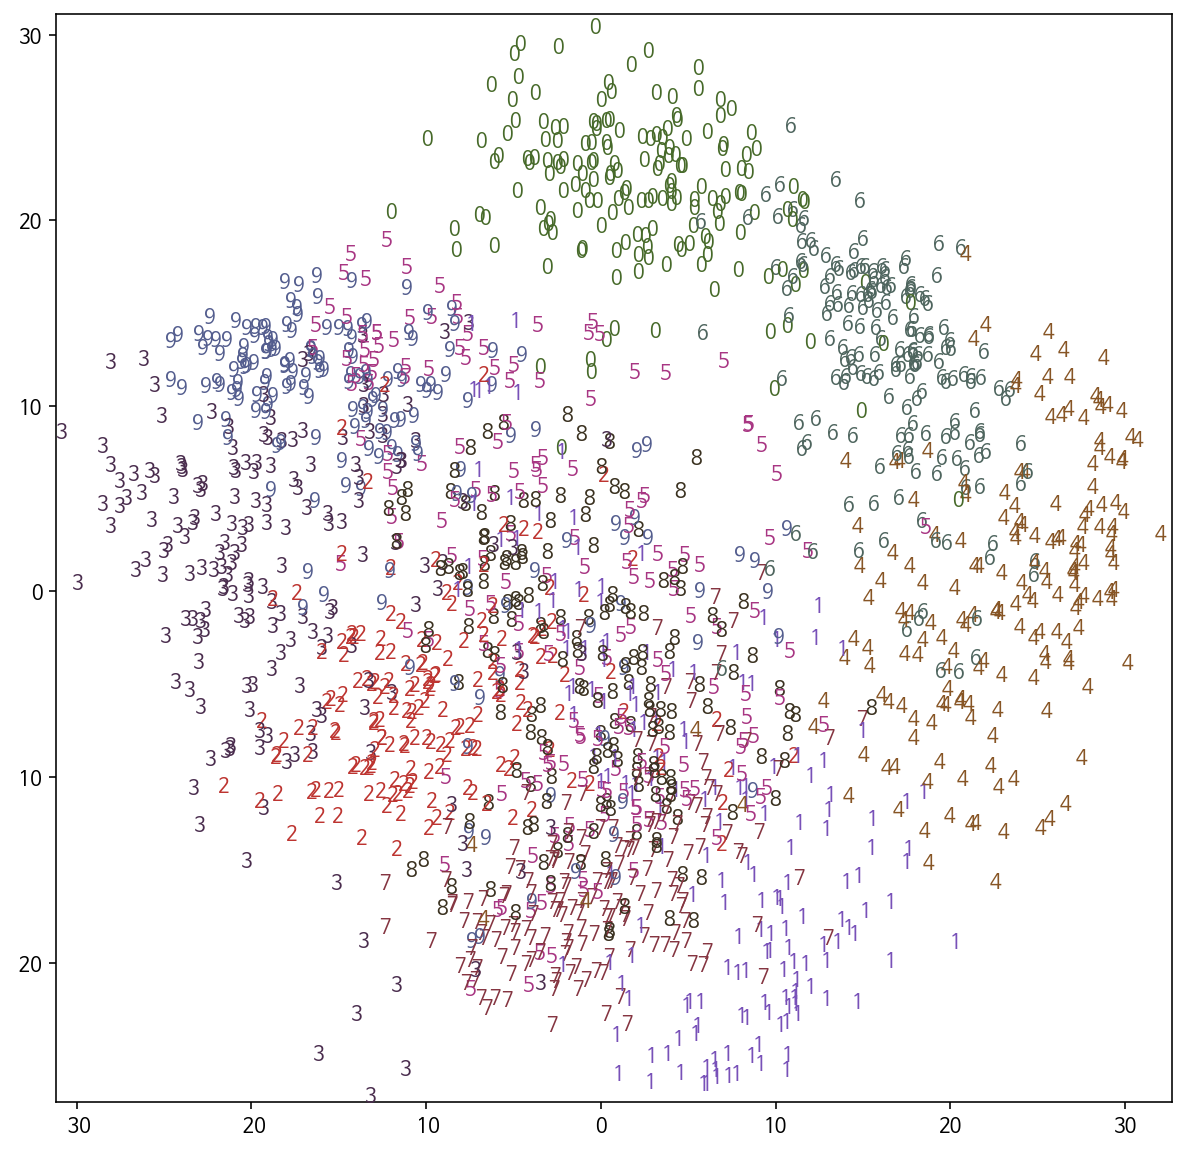

In [109]:
# PCA를 사용해 데이터를 2차원으로 축소하여 시각화
# PCA 모델을 생성
# 처음 두 개의 주성분으로 숫자 데이터를 변환
# 숫자 텍스트를 이용한 산점도
pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X)

plt.figure( figsize = (10, 10) )
plt.xlim(X_pca[:, 0].min(), X_pca[:,0].max() +1)
plt.ylim(X_pca[:, 1].min(), X_pca[:,1].max() +1)

for i in range( len(X) ) :
    plt.text(X_pca[i, 0], X_pca[i, 1], str(y[i]), color = colors[y[i]] )

plt.show()

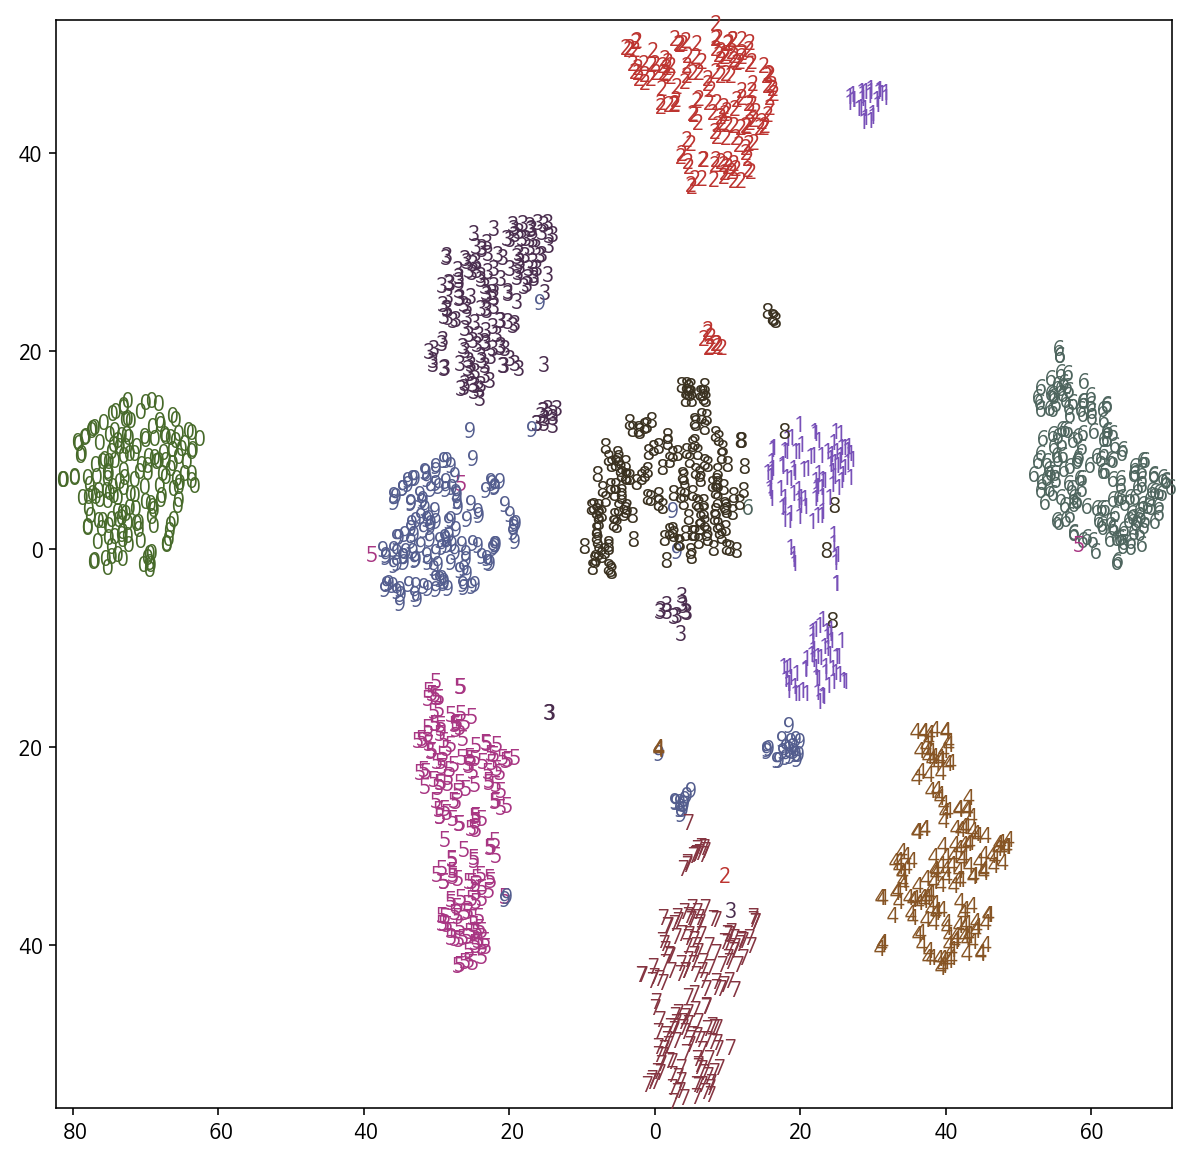

In [110]:
# t-SNE를 적용해 결과를 비교
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)


plt.figure( figsize = (10, 10) )
plt.xlim(X_tsne[:, 0].min(), X_tsne[:,0].max() +1)
plt.ylim(X_tsne[:, 1].min(), X_tsne[:,1].max() +1)


for i in range( len(X) ) :
    plt.text(X_tsne[i, 0], X_tsne[i, 1], str(y[i]), color=colors[y[i]] )

plt.show()

In [ ]:
# 처음 두 개의 주성분으로 숫자 데이터를 변환
# 숫자 텍스트를 이용한 산점도
